In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import plot_tree
import pandas as pd
import matplotlib.pyplot as plt

from preference_learning import load_dataframe

# Load the dataset
df = load_dataframe(mode='processed')

# Train the dataset using XGBoost with grid search
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [2]:
X

,buying,maint,doors,persons,lug_boot,safety
0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.5
2,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.5,0.0
4,1.0,1.0,0.0,0.0,0.5,0.5
...,...,...,...,...,...,...
1723,0.0,0.0,1.0,1.0,0.5,0.5
1724,0.0,0.0,1.0,1.0,0.5,1.0
1725,0.0,0.0,1.0,1.0,1.0,0.0
1726,0.0,0.0,1.0,1.0,1.0,0.5


Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best: -0.037395 using {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.8}
Accuracy: 99.42%


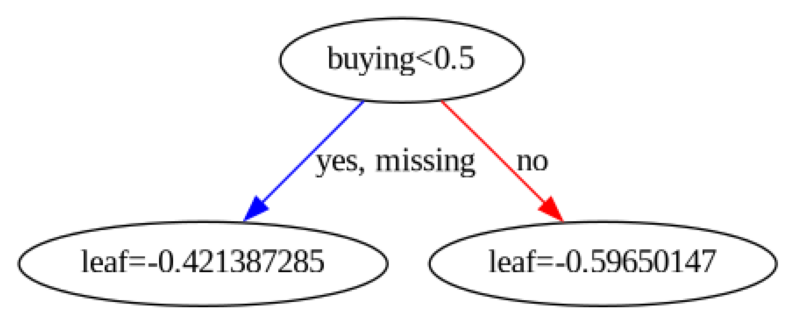

In [3]:
# Now train with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [1],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Initialize XGB and GridSearch
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)

# Run the grid search
grid_result = grid_search.fit(X, y)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the accuracy
y_pred = grid_result.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Plot the tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(grid_result.best_estimator_, num_trees=0, ax=ax)
plt.show()

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best: -0.029696 using {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 99.71%


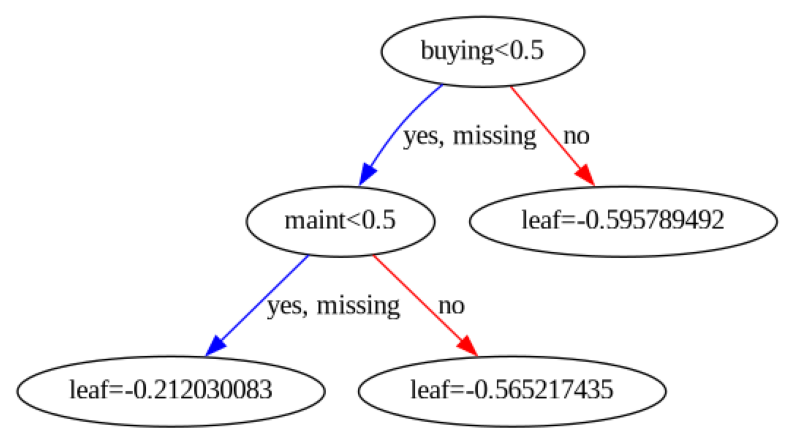

In [4]:
# Now train with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [2],
    'n_estimators': [200]
}

# Initialize XGB and GridSearch
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)

# Run the grid search
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the accuracy
y_pred = grid_result.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Plot the tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(grid_result.best_estimator_, num_trees=0, ax=ax)
plt.show()

In [ ]:
# Now train with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300, 400]
}

# Initialize XGB and GridSearch
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)

# Run the grid search
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the accuracy
y_pred = grid_result.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Plot the tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(grid_result.best_estimator_, num_trees=0, ax=ax)
plt.show()

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


In [ ]:
# Now train with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [1],
    'n_estimators': [400, 500, 600]
}

# Initialize XGB and GridSearch
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)

# Run the grid search
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the accuracy
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123, **grid_result.best_params_)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

# Plot the tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(xgb_model, num_trees=0, ax=ax)
plt.show()

In [ ]:
pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [ ]:
# Now train with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [2],
    'n_estimators': [100, 200]
}

# Initialize XGB and GridSearch
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)

# Run the grid search
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the accuracy
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123, **grid_result.best_params_)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

# Plot the tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(xgb_model, num_trees=0, ax=ax)
plt.show()

In [ ]:
pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [ ]:
# Now train with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3],
    'n_estimators': [100, 200, 300, 400]
}

# Initialize XGB and GridSearch
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)

# Run the grid search
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the accuracy
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123, **grid_result.best_params_)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

# Plot the tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(xgb_model, num_trees=0, ax=ax)
plt.show()

In [ ]:
pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [ ]:
# Now train with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [4],
    'n_estimators': [100, 200, 300, 400]
}

# Initialize XGB and GridSearch
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)

# Run the grid search
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the accuracy
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123, **grid_result.best_params_)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

# Plot the tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(xgb_model, num_trees=0, ax=ax)
plt.show()

In [ ]:
pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [ ]:
# Now train with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': list(range(3, 10, 1)),
    'n_estimators': [100, 200, 300, 400, 500]
}

# Initialize XGB and GridSearch
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)

# Run the grid search
grid_result = grid_search.fit(X, y)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the accuracy
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123, **grid_result.best_params_)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

# Plot the tree
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(grid_result.best_estimator_, num_trees=0, ax=ax)
plt.show()

In [ ]:
pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [15]:
# For this best model, show Accuracy, F1 and AUC
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
auc = roc_auc_score(y, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))
print("AUC: %.2f%%" % (auc * 100.0))

# Using confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = best_model.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))


Accuracy: 79.95%
F1: 73.36%
AUC: 79.75%
[[402  98]
 [ 56 212]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       500
           1       0.68      0.79      0.73       268

    accuracy                           0.80       768
   macro avg       0.78      0.80      0.79       768
weighted avg       0.81      0.80      0.80       768

